# We collect Stats on the grammar

first initialise logger :) 

In [1]:
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

dataset_fname = 'toolsdata/bursi.pos.gspan'

### induce a grammar and train an estimator


In [3]:
%%time
from graphlearn.graphlearn import Sampler
training_graphs = get_graphs(dataset_fname, size=200)
sampler=Sampler(radius_list=[0,1],thickness_list=[2],
                          min_cip_count=2, min_interface_count=2)
sampler.fit(training_graphs,grammar_n_jobs=1, grammar_batch_size=10)

print('graph grammar stats:')
n_instances, n_interfaces, n_cores, n_cips = sampler.grammar().size()
print('#instances: %d   #interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (n_instances,
                                                                                     n_interfaces,
                                                                                     n_cores,
                                                                                     n_cips))

graph grammar stats:
#instances: 200   #interfaces: 82   #cores: 48   #core-interface-pairs: 258
CPU times: user 7.59 s, sys: 348 ms, total: 7.94 s
Wall time: 12 s


### what are the most frequent CIPS?

interface id: 324658 [15 options]


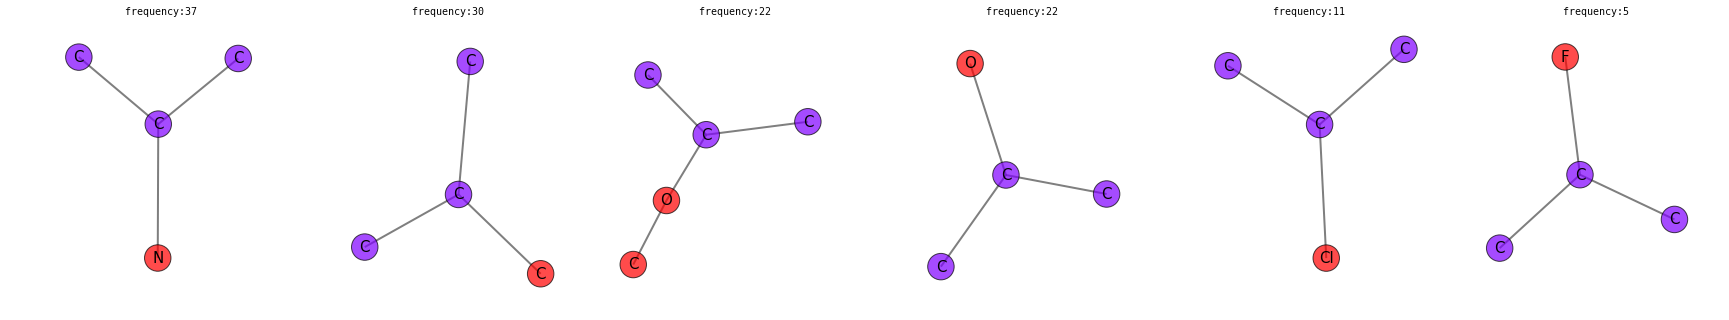

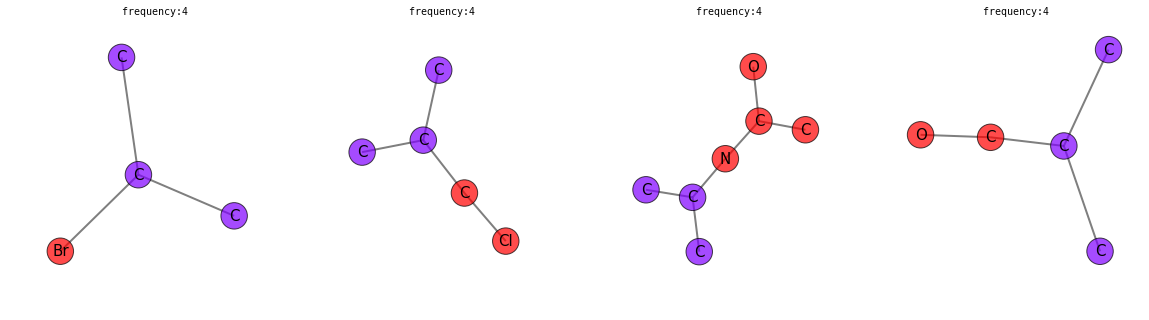

interface id: 298860 [14 options]


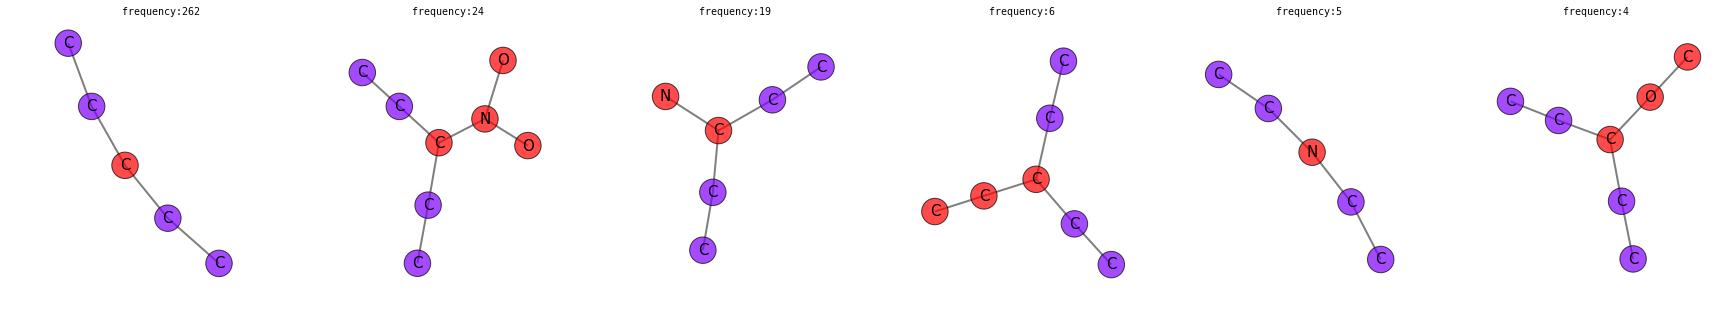

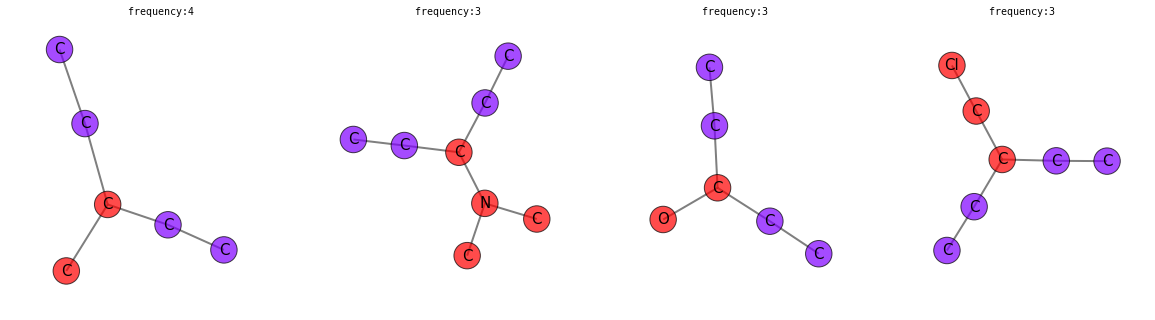

interface id: 918308 [9 options]


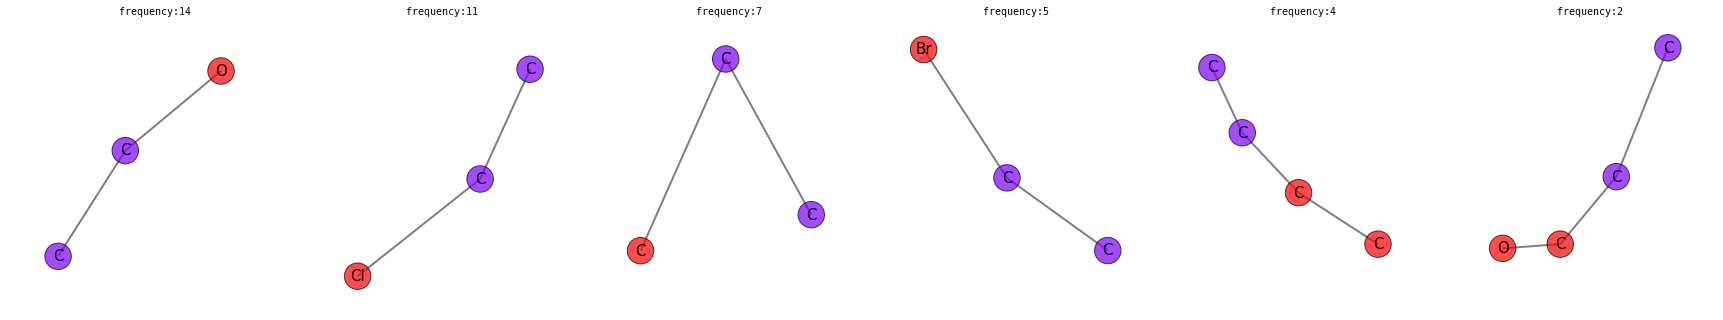

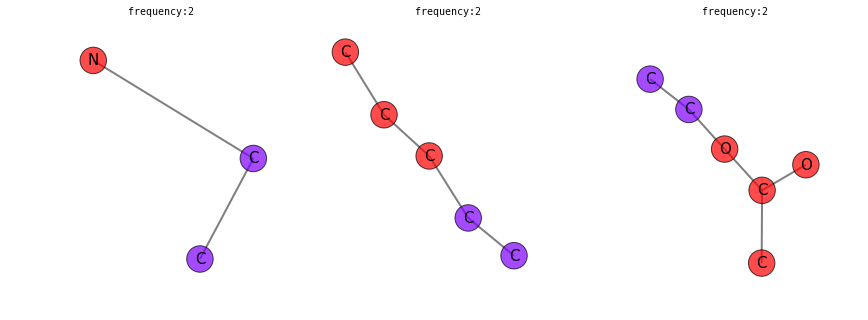

interface id: 62940 [8 options]


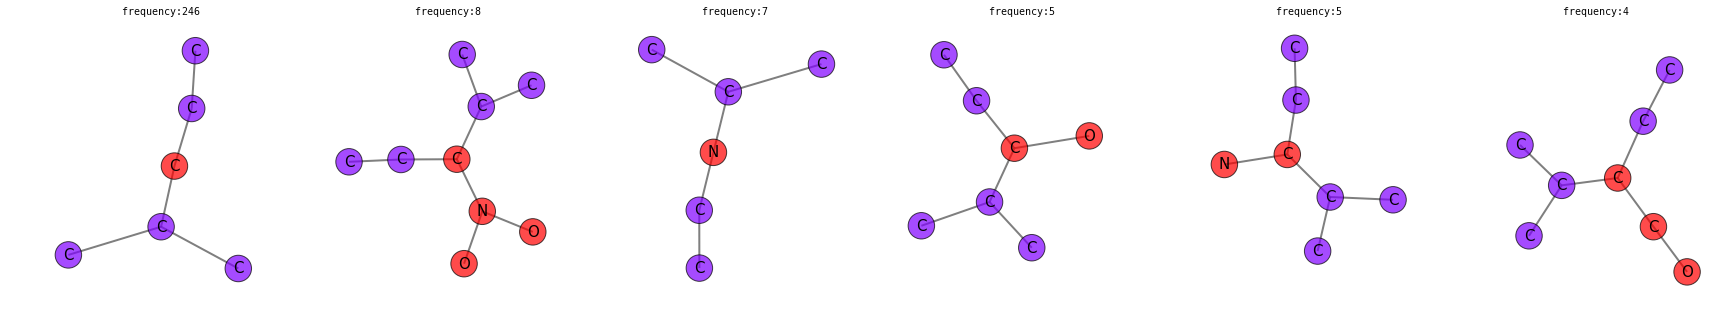

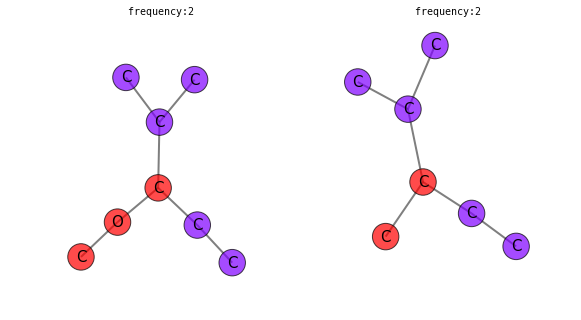

interface id: 175012 [7 options]


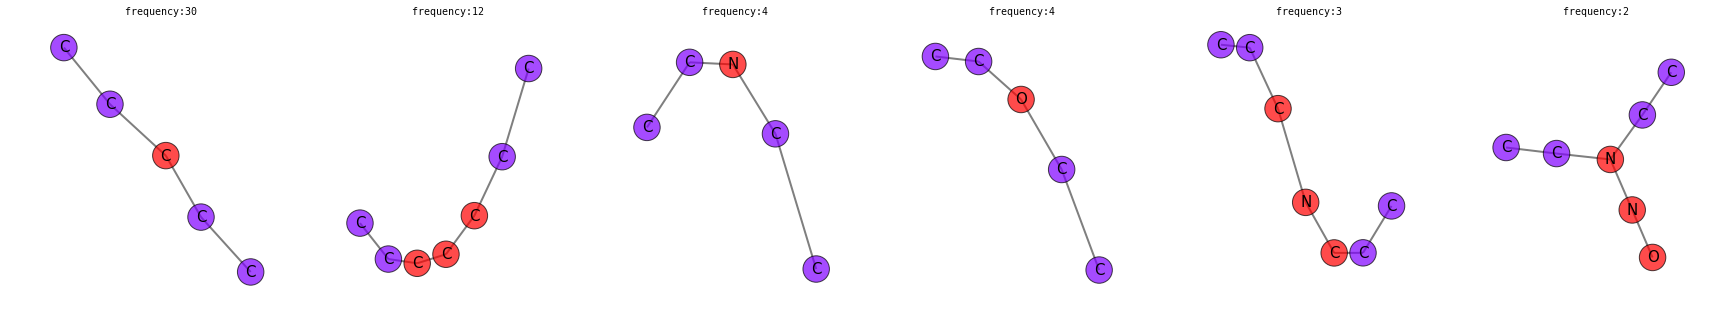

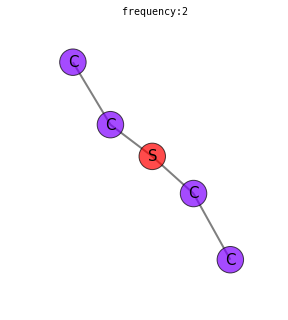

interface id: 335876 [6 options]


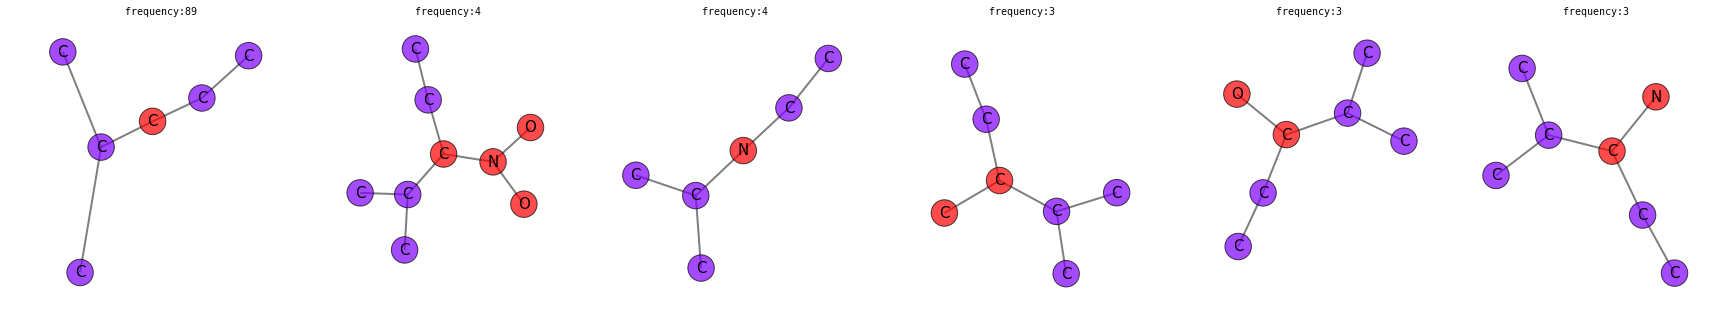

In [4]:
#draw production rules
from graphlearn.utils.draw import draw_grammar
draw_grammar(sampler.grammar().productions, contract=True,
             n_productions=6,n_graphs_per_line=6, 
             size=5, colormap='rainbow', node_border=1, vertex_alpha=0.7, edge_alpha=0.5, node_size=700)


### how are the CIPs distributed?

how often do we see interface hashes
# productions: 258
x = # interfaces (total: 82)
y=number of cores(ihash), y=sum Of Core Counts(ihash)


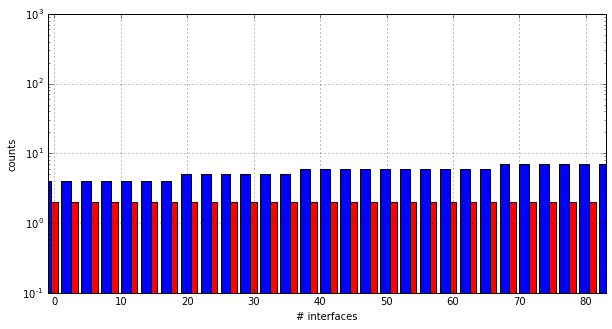

how often was this corehash seen?
x = # cores (total: 48)
y = in Y interfaces(chash), y= sum Of Count Over All Interfaces(chash)


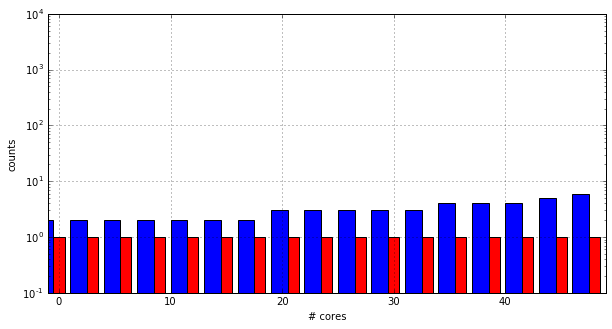

histogram
# productions: 258
distinct cores: 48 (seen on x axis)
interfaces with x many cores were observed y many times. 


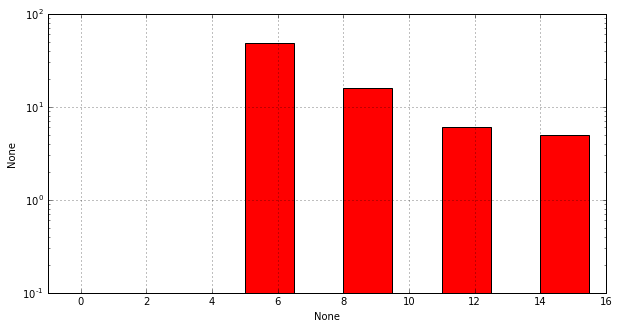

other histogram
how many cores exist with x many interfaces


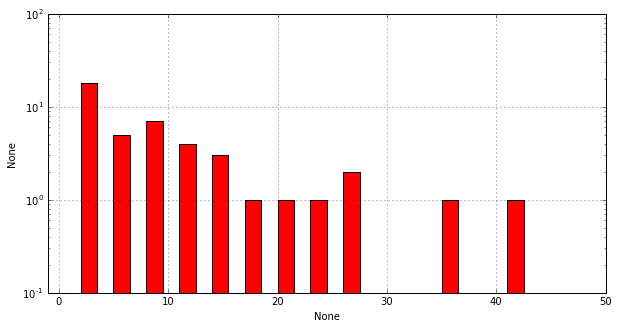

In [5]:
#grammar statistics
from graphlearn.utils.draw import draw_grammar_stats
draw_grammar_stats(sampler.lsgg.productions, size=(10,5))

### analyse grammar size under different parameters

In [6]:
%%time
from graphlearn.graphlearn import Sampler
from itertools import tee
for radius in range(0,2):
    for thickness in range(1,3):
        print 'Radius: %d   Thickness: %d' % (radius, thickness)
        for size in range(100,250,50):
            training_graphs = get_graphs(dataset_fname, size=size)
            training_graphs,training_graphs_=tee(training_graphs)

            sampler=Sampler(radius_list=[radius],
                                      thickness_list=[thickness],
                                      min_cip_count=2, 
                                      min_interface_count=2,
                                      random_state=42)

            sampler.fit(training_graphs_,grammar_n_jobs=1, grammar_batch_size=10)

            n_instances, n_interfaces, n_cores, n_cips = sampler.lsgg.size()
            print('#instances: %3d   #interfaces: %4d   #cores: %4d   #core-interface-pairs: %5d' % (n_instances,
                                                                                                 n_interfaces,
                                                                                                 n_cores,
                                                                                                 n_cips))

Radius: 0   Thickness: 1
#instances: 100   #interfaces:   12   #cores:    7   #core-interface-pairs:    31
#instances: 150   #interfaces:   17   #cores:    7   #core-interface-pairs:    42
#instances: 200   #interfaces:   19   #cores:    8   #core-interface-pairs:    49
Radius: 0   Thickness: 2
#instances: 100   #interfaces:   15   #cores:    7   #core-interface-pairs:    38
#instances: 150   #interfaces:   22   #cores:    7   #core-interface-pairs:    59
#instances: 200   #interfaces:   29   #cores:    7   #core-interface-pairs:    75
Radius: 1   Thickness: 1
#instances: 100   #interfaces:   41   #cores:   47   #core-interface-pairs:   170
#instances: 150   #interfaces:   54   #cores:   62   #core-interface-pairs:   238
#instances: 200   #interfaces:   61   #cores:   64   #core-interface-pairs:   285
Radius: 1   Thickness: 2
#instances: 100   #interfaces:   17   #cores:   24   #core-interface-pairs:    50
#instances: 150   #interfaces:   29   #cores:   34   #core-interface-pairs:    8

---